# 1st_Assignment
## Exercise 1

In [1]:
!pip install opendatasets
import numpy as naaaaaaaaaaaaaaaaaaaaaaa
import pandas as pd
import sklearn
import plotly.express as px
import seaborn as sns
import opendatasets as od
import os

In [2]:
# download dataset

link = 'https://www.kaggle.com/datasets/imdevskp/corona-virus-report'
od.download(link)
# check current directory and it's lists
os.listdir(os.getcwd())

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tingwu28
Your Kaggle Key: ··········


100%|██████████| 19.0M/19.0M [00:00<00:00, 89.9MB/s]


['.config', 'corona-virus-report', 'sample_data']

In [3]:
# check the datasets
data_dir = './corona-virus-report'
os.listdir(data_dir)

['usa_county_wise.csv',
 'country_wise_latest.csv',
 'day_wise.csv',
 'covid_19_clean_complete.csv',
 'worldometer_data.csv',
 'full_grouped.csv']

In [4]:
# begin to explore the dataset full_grouped.csv

covid19_data = pd.read_csv('corona-virus-report/full_grouped.csv')

In [6]:
def check_df(dataframe, head = 5):
  print('################## info #############')
  print(dataframe.info())
  print('################## head #############')
  print(dataframe.head(head))
  print('################## tail #############')
  print(dataframe.tail(head))



In [7]:
check_df(covid19_data)

################## info #############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB
None
################## head #############
         Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0    

## Exercise 2

In [8]:
# Identify the correlation between all attributes
covid19_data.corr()

<ipython-input-8-657cbce7ffa7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covid19_data.corr()


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Confirmed,1.000000,0.912016,0.894418,0.949940,0.893966,0.602815,0.675623
Deaths,0.912016,1.000000,0.761093,0.891647,0.767812,0.630283,0.551870
Recovered,0.894418,0.761093,1.000000,0.710665,0.808816,0.515154,0.761926
Active,0.949940,0.891647,0.710665,1.000000,0.846513,0.583212,0.534027
New cases,0.893966,0.767812,0.808816,0.846513,1.000000,0.733583,0.725761
New deaths,0.602815,0.630283,0.515154,0.583212,0.733583,1.000000,0.503319
New recovered,0.675623,0.551870,0.761926,0.534027,0.725761,0.503319,1.000000


<ipython-input-10-e6b8e5c2db84>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid19_data.corr())


<Axes: >

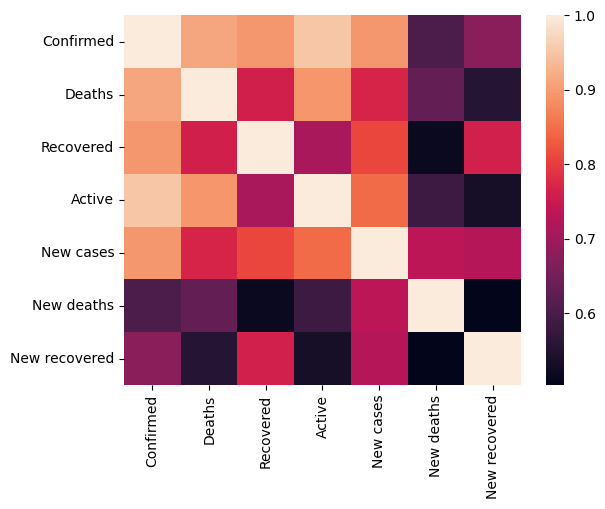

In [10]:
# Visualize the correlations between the attributes
sns.heatmap(covid19_data.corr())

<ipython-input-35-ead8d667634a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid19_data.corr(),annot=True)


<Axes: >

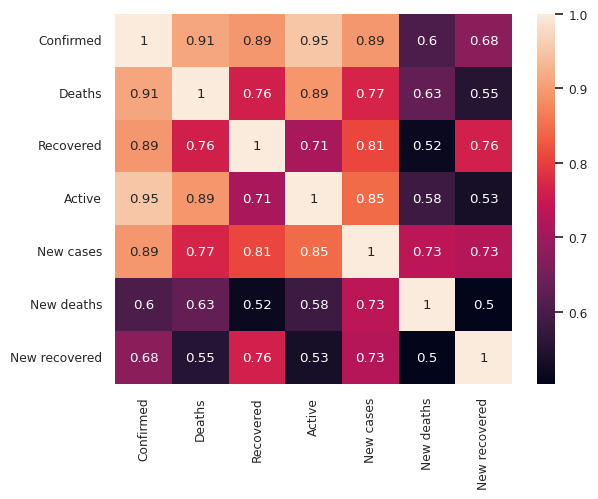

In [35]:
# set scale
sns.set(font_scale = 0.8)
sns.heatmap(covid19_data.corr(),annot=True)

In [18]:
# Check the Catagorical and numerical type
cat_col = covid19_data.select_dtypes(include='object').columns
num_col = covid19_data.select_dtypes(include=['int32','int64','float32','float64']).columns
print(cat_col)
print(num_col)

Index(['Date', 'Country/Region', 'WHO Region'], dtype='object')
Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths',
       'New recovered'],
      dtype='object')


array([[<Axes: title={'center': 'Confirmed'}>,
        <Axes: title={'center': 'Deaths'}>,
        <Axes: title={'center': 'Recovered'}>],
       [<Axes: title={'center': 'Active'}>,
        <Axes: title={'center': 'New cases'}>,
        <Axes: title={'center': 'New deaths'}>],
       [<Axes: title={'center': 'New recovered'}>, <Axes: >, <Axes: >]],
      dtype=object)

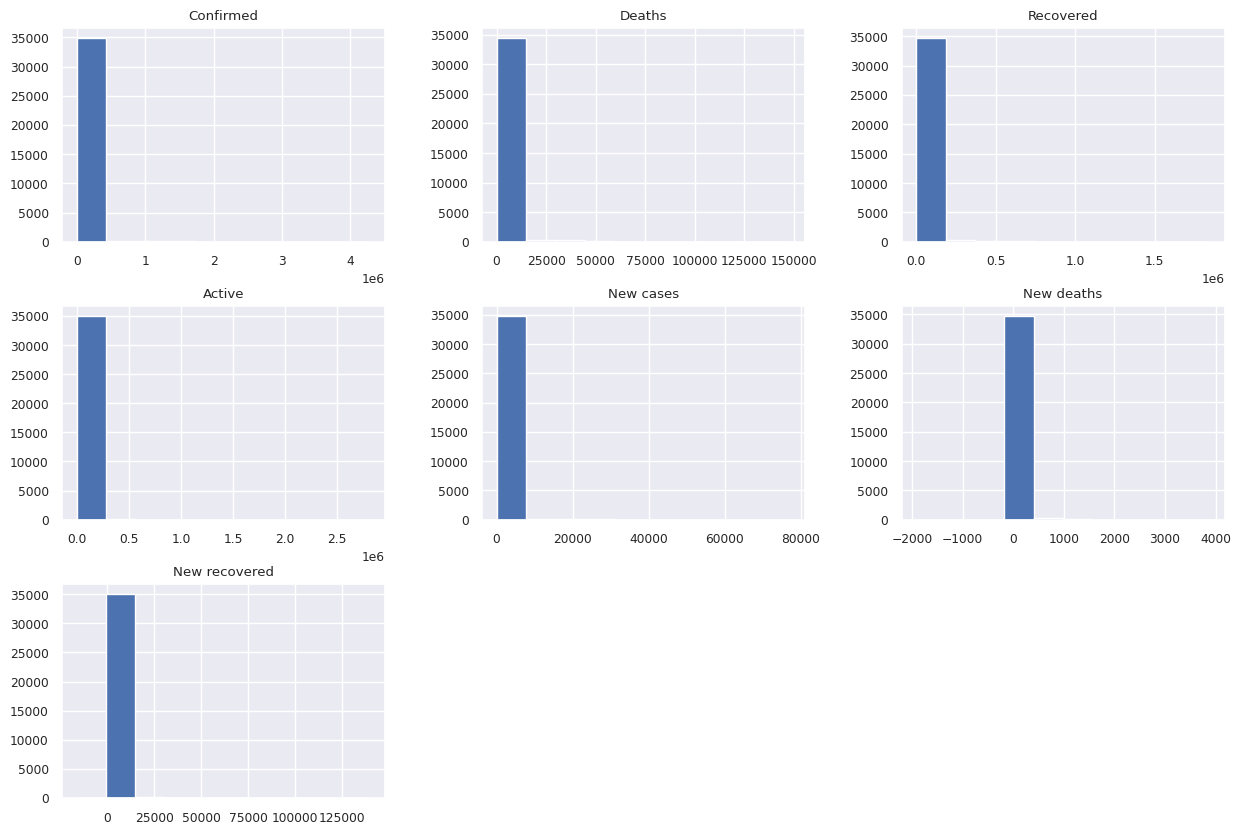

In [23]:
covid19_data.hist(figsize=(15,10))

In [31]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

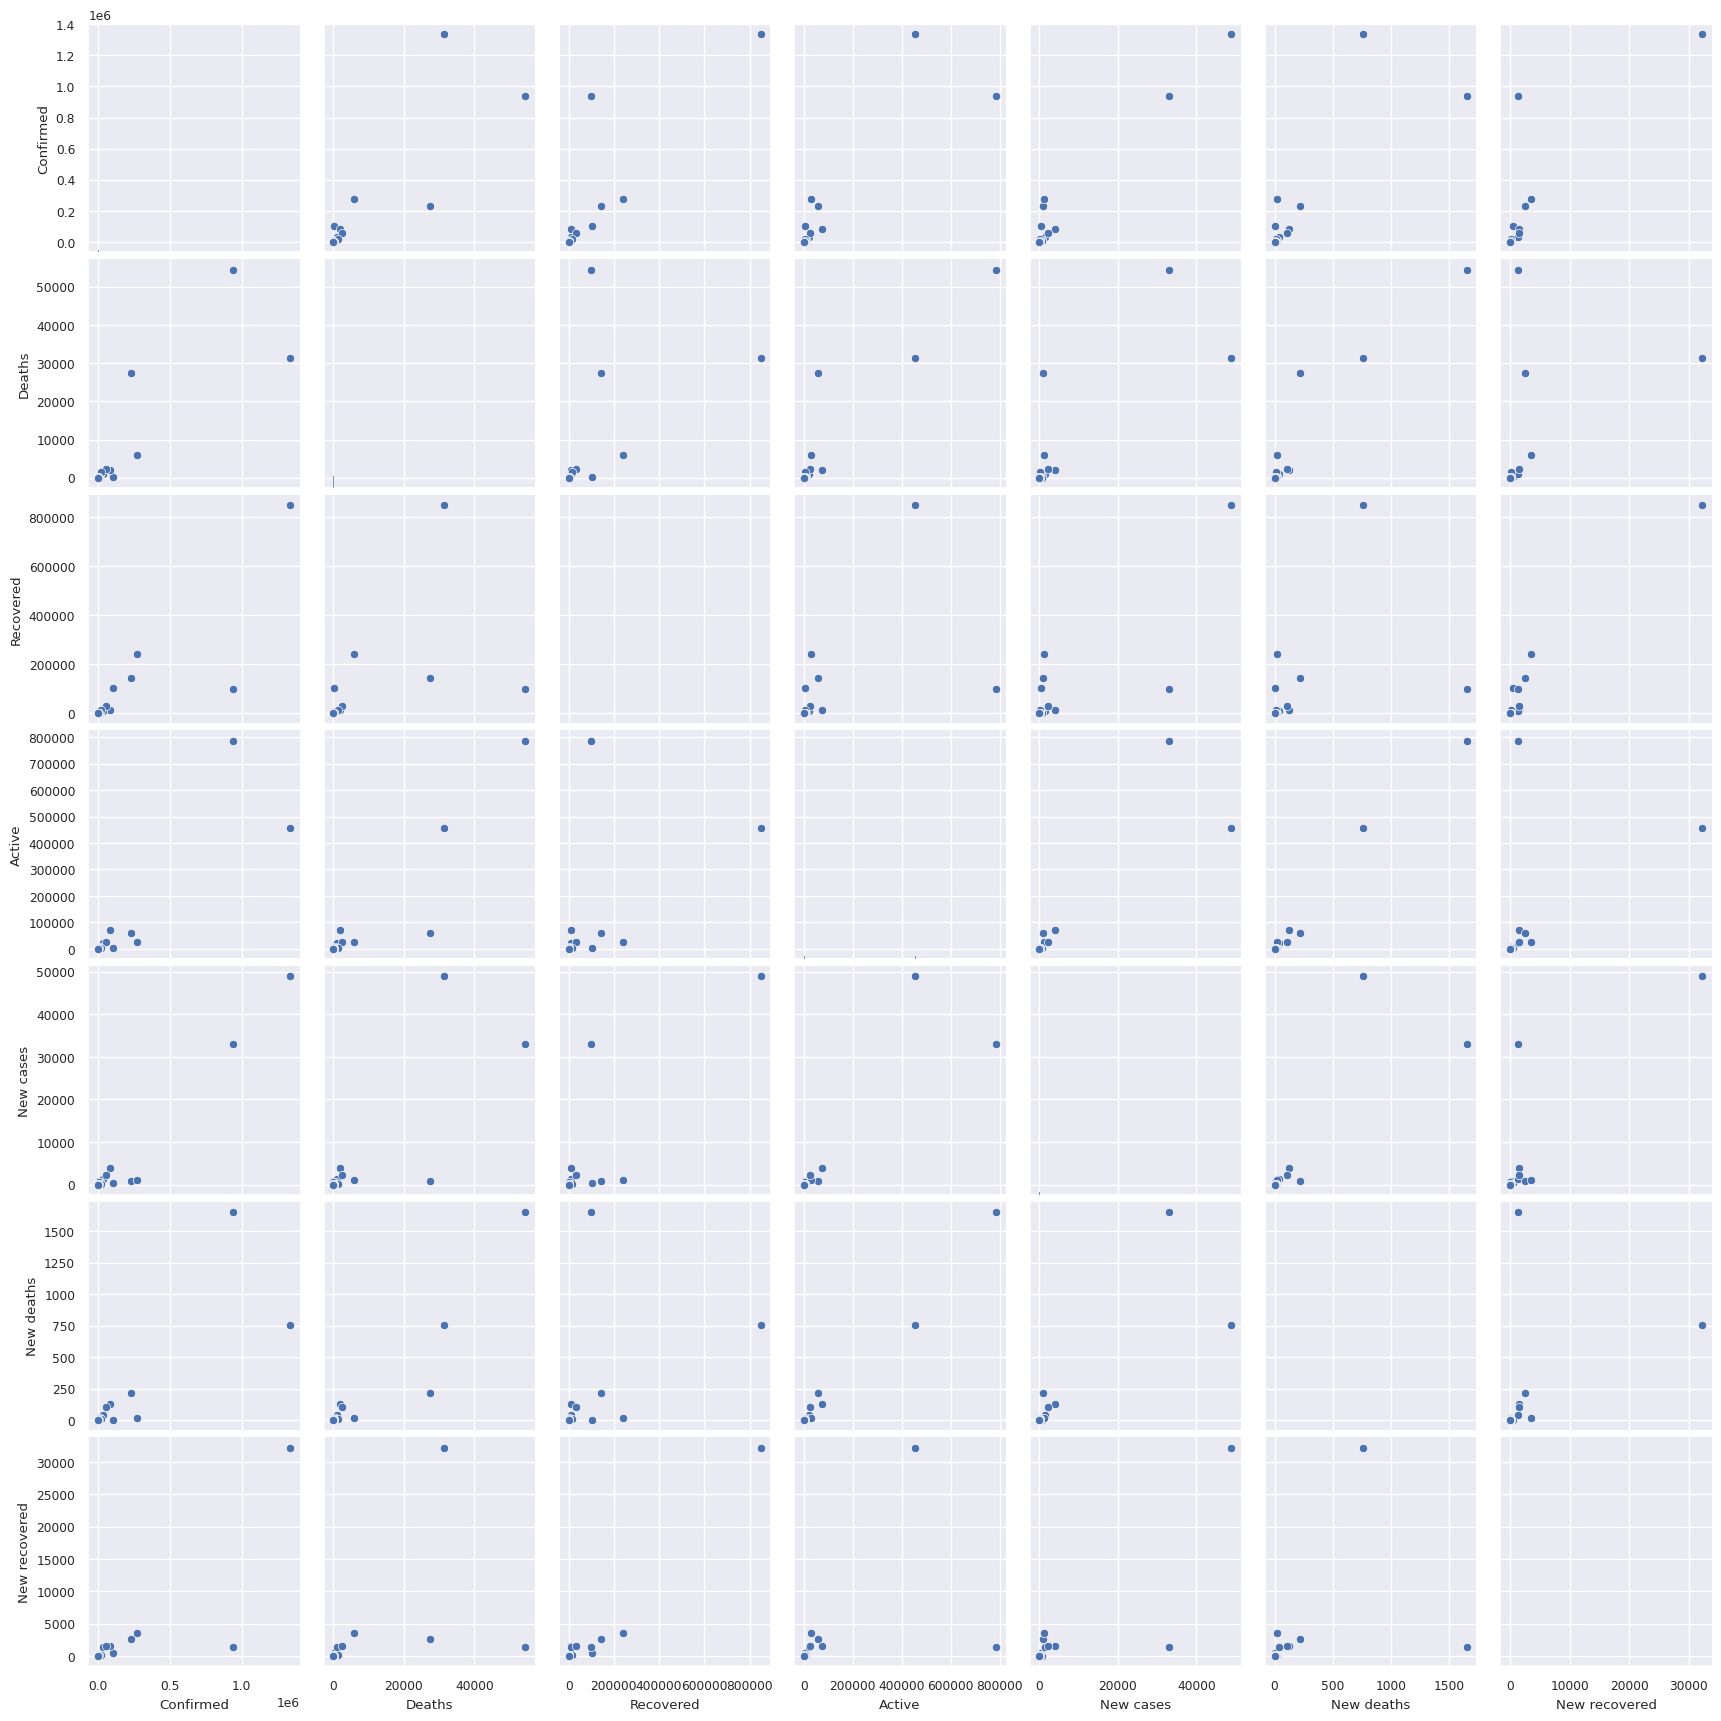

In [34]:
# don't know why pairplot runs extremely slow so have 100 samples to try
sns.pairplot(covid19_data[num_col].sample(100))

## Exercise 3

In [36]:
# Identify the numerical and categorical attributes
cat_col = covid19_data.select_dtypes(include='object').columns
num_col = covid19_data.select_dtypes(include=['int32','int64','float32','float64']).columns
print(cat_col)
print(num_col)

Index(['Date', 'Country/Region', 'WHO Region'], dtype='object')
Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths',
       'New recovered'],
      dtype='object')


In [41]:
# drop the "Active" attribute
covid19_data = covid19_data.drop('Active',axis = 1)

In [42]:
covid19_data.shape

(35156, 9)

In [44]:
# create a subset with 'New cases' over 100 and print the shape
new_cases_over100 = covid19_data[covid19_data['New cases']>100]
new_cases_over100.shape

(8004, 9)

In [75]:
# create a subset records from Europe and date '2020-07-27' and print the shape

euro_date = covid19_data[(covid19_data['WHO Region']=='Europe') & (covid19_data['Date']=='2020-07-27')]
euro_date.shape

(56, 9)

<Axes: xlabel='None,Country/Region'>

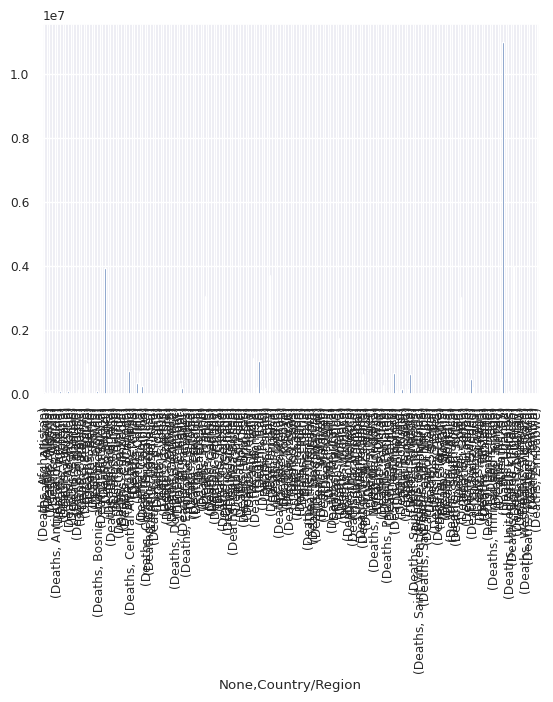

In [96]:
# visualize the deaths per country using matplotlib and bar()
covid19_data[['Country/Region','Deaths']].groupby('Country/Region').sum().unstack().plot.bar()
